In [1]:
# set up notebook to show plots within the notebook
%matplotlib inline

# Import necessary libraries:
# General utilities:
import os
import sys
from time import time
# from scipy.misc import imsave

# Computation:
import numpy as np
import h5py
from skimage import measure
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist 

# Visualization:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import display
import ipywidgets as widgets
from mpl_toolkits.axes_grid1 import ImageGrid

# Finally, pycroscopy itself
sys.path.append('../../../')
import pycroscopy as px
import pyUSID as usid
import sidpy

/Users/sulaymandesai/.pyenv/versions/3.8.3/lib/python3.8/site-packages/pyUSID/viz/__init__.py:16: FutureWarning: Please use sidpy.viz.plot_utils instead of pyUSID.viz.plot_utils. pyUSID.plot_utils will be removed in a future release of pyUSID
  warn('Please use sidpy.viz.plot_utils instead of pyUSID.viz.plot_utils. '


In [2]:
orig = os.getcwd()

In [3]:
dir_1 = '/Users/sulaymandesai/Documents/Year_4/MSciProject/Translator'
os.chdir(dir_1)

In [4]:
from FlatFileTranslator import FlatFileTranslator

In [5]:
os.chdir(orig)

In [6]:
input_folder_path = '/Users/sulaymandesai/Documents/Year_4/MSciProject/LoadData/STM'
h5_folder_path = '/Users/sulaymandesai/Desktop/h5py'

In [7]:
trans_1 = FlatFileTranslator()

/Users/sulaymandesai/.pyenv/versions/3.8.3/lib/python3.8/site-packages/sidpy/sid/translator.py:42: FutureWarning: Consider using sidpy.Reader instead of sidpy.Translator if possible and contribute your reader to ScopeReaders
  warn('Consider using sidpy.Reader instead of sidpy.Translator if '


In [8]:
# h5_path_array = trans_1.translate(input_folder_path, h5_folder_path)

In [12]:
h5_path = '/Users/sulaymandesai/Documents/Year_4/MSciProject/LoadData/h5/default_2017Jun09-162147_STM-STM_Spectroscopy--11_1_down-bwd.h5'
h5_path

'/Users/sulaymandesai/Documents/Year_4/MSciProject/LoadData/h5/default_2017Jun09-162147_STM-STM_Spectroscopy--11_1_down-bwd.h5'

In [13]:
h5_file = h5py.File(h5_path, mode='r+')
usid.hdf_utils.print_tree(h5_file)

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Spectroscopic_Indices
    ├ Spectroscopic_Values


In [14]:
usid.hdf_utils.print_tree(h5_file, main_dsets_only=True)

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Raw_Data


In [15]:
h5_main = usid.USIDataset(h5_file['/Measurement_000/Channel_000/Raw_Data'])

/Users/sulaymandesai/.pyenv/versions/3.8.3/lib/python3.8/site-packages/pyUSID/io/dtype_utils.py:62: FutureWarning: pyUSID.io.dtype_utils.contains_integers has been moved to sidpy.base.num_utils.contains_integers. This copy in pyUSID willbe removed in future release. Please update your import statements
  warn('pyUSID.io.dtype_utils.contains_integers has been moved to '
/Users/sulaymandesai/.pyenv/versions/3.8.3/lib/python3.8/site-packages/pyUSID/io/dtype_utils.py:38: FutureWarning: pyUSID.io.dtype_utils.lazy_load_array has been moved to sidpy.hdf.hdf_utils.lazy_load_array. This copy in pyUSID willbe removed in future release. Please update your import statements
  warn('pyUSID.io.dtype_utils.lazy_load_array has been moved to '


In [16]:
h5_main

<HDF5 dataset "Raw_Data": shape (122500, 1), type "<f8">
located at: 
	/Measurement_000/Channel_000/Raw_Data 
Data contains: 
	Z-height (nm) 
Data dimensions and original shape: 
Position Dimensions: 
	Y - size: 350 
	X - size: 350 
Spectroscopic Dimensions: 
	arb. - size: 1
Data Type:
	float64

In [17]:
h5_pos = h5_main.parent[h5_main.attrs['Position_Indices']]

In [18]:
h5_pos

<HDF5 dataset "Position_Indices": shape (122500, 2), type "<u4">

In [19]:
# determine the image size:
num_x = len(np.unique(h5_pos[:,0]))
num_y = len(np.unique(h5_pos[:,1]))

In [20]:
raw_image_mat = np.reshape(h5_main[()], [num_x,num_y]);

In [21]:
raw_image_mat

array([[-5.62870259e-08, -5.62909357e-08, -5.62951481e-08, ...,
        -5.64662412e-08, -5.64651165e-08, -5.64631222e-08],
       [-5.62974519e-08, -5.63012368e-08, -5.63041917e-08, ...,
        -5.64716323e-08, -5.64693080e-08, -5.64688288e-08],
       [-5.63129411e-08, -5.63142426e-08, -5.63133164e-08, ...,
        -5.64703852e-08, -5.64688622e-08, -5.64690308e-08],
       ...,
       [-5.87897865e-08, -5.87869303e-08, -5.87854068e-08, ...,
        -5.89593903e-08, -5.89615334e-08, -5.89620900e-08],
       [-5.87940779e-08, -5.87899075e-08, -5.87875625e-08, ...,
        -5.89703140e-08, -5.89742673e-08, -5.89757906e-08],
       [-5.88032725e-08, -5.88016838e-08, -5.88008933e-08, ...,
        -5.89756940e-08, -5.89796055e-08, -5.89811410e-08]])

(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x124cc3880>)

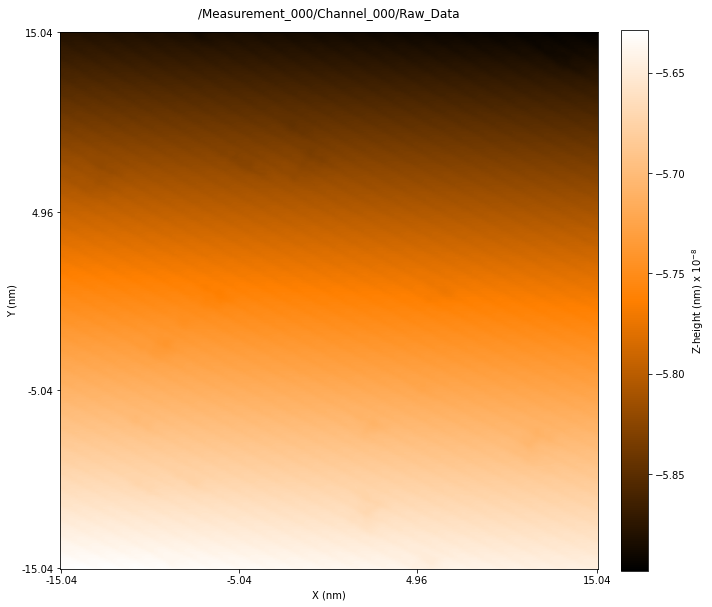

In [22]:
import spiepy

# h5_main = usid.USIDataset(h5_file['/Measurement_000/Channel_000/Raw_Data'])
# print(h5_main)
h5_main.visualize(cmap = spiepy.NANOMAP, figsize=(10,10))

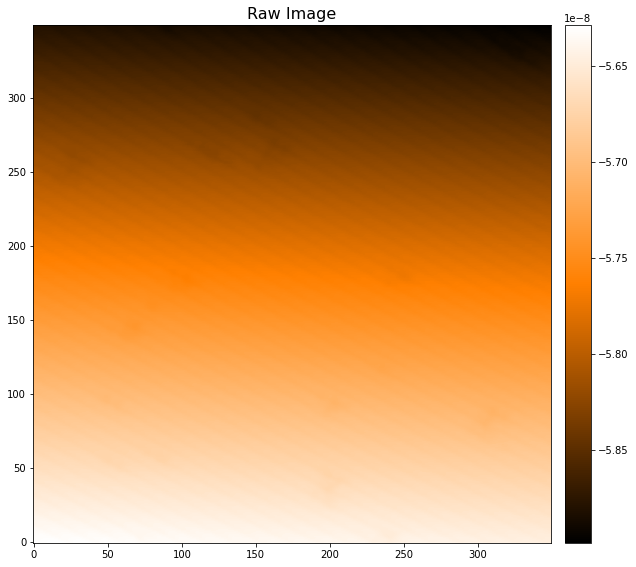

In [23]:
fig, axis = plt.subplots(figsize=(10,10))
img = axis.imshow(raw_image_mat,cmap=spiepy.NANOMAP, origin = 'lower');
divider = make_axes_locatable(axis)
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(img, cax=cax)
axis.set_title('Raw Image', fontsize=16);

Determining appropriate window size from image.


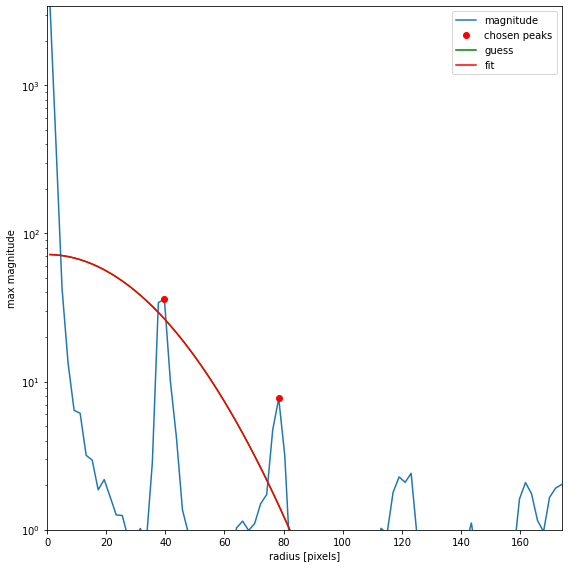

Window size = 17


In [24]:
iw = px.processing.ImageWindow(h5_main)

num_peaks = 2
win_size , psf_width = iw.window_size_extract(num_peaks, save_plots=False, show_plots=True)

print('Window size = {}'.format(win_size))

In [29]:
usid.hdf_utils.print_tree(h5_file)

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Raw_Data-Windowing_000
      ----------------------
    ├ Spectroscopic_Indices
    ├ Spectroscopic_Values


In [26]:
# This creates a 4D data set that associates each pixel with a window
fft_mode = None # Options are None, 'abs', 'data+abs', or 'complex'
t0 = time()
h5_wins = iw.do_windowing(win_x=win_size,
                          win_y=win_size,
                          save_plots=False,
                          show_plots=False,
                          win_fft=fft_mode)
print('Windowing took {} seconds.'.format(round(time()-t0, 2)))
print('\nRaw data was of shape {} and the windows dataset is now of shape {}'.format(h5_main.shape, h5_wins.shape))
print('Now each position (window) is descibed by a set of pixels')

Determining appropriate window size from image.
Optimal window size determined to be 17x17 pixels.


/Users/sulaymandesai/.pyenv/versions/3.8.3/lib/python3.8/site-packages/pyUSID/io/dtype_utils.py:309: FutureWarning: pyUSID.io.dtype_utils.validate_single_string_arg has been moved to sidpy.base.string_utils.validate_single_string_arg. This copy in pyUSID willbe removed in future release. Please update your import statements
  warn('pyUSID.io.dtype_utils.validate_single_string_arg has been moved to '


TypeError: write_simple_attrs() got multiple values for argument 'verbose'

In [26]:
help(iw.do_windowing)

Help on method do_windowing in module pycroscopy.processing.image_processing:

do_windowing(win_x=None, win_y=None, win_step_x=1, win_step_y=1, win_fft=None, *args, **kwargs) method of pycroscopy.processing.image_processing.ImageWindow instance
    Extract the windows from the normalized image and write them to the file
    
    Parameters
    ----------
    win_x : int, optional
        size of the window, in pixels, in the horizontal direction
        Default None, a guess will be made based on the FFT of the image
    win_y : int, optional
        size of the window, in pixels, in the vertical direction
        Default None, a guess will be made based on the FFT of the image
    win_step_x : int, optional
        step size, in pixels, to take between windows in the horizontal direction
        Default 1
    win_step_y : int, optional
        step size, in pixels, to take between windows in the vertical direction
        Default 1
    win_fft : str, optional
        What kind of fft 